# Team A: Group photo

![A group of people standing and sitting around a dining table.](https://github.com/uol-mediaprocessing/notebooks/raw/master/pictures/image10.jpeg)

## Objective

Purpose of this project is to create software which merges photographs of groups to ensure as many subjects as possible look directly at the camera with open eyes and a smile.

To achieve this the application has to:

* recognize faces
* evaluate faces according to a number of fixed criteria
  * person is smiling
  * eyes are open
  * looking at the camera
  * face is not obstructed
  * ...
* respect which face belongs to whose head and body
* pick the optimal picture of each persons face from all sources
* merge several pictures into one
  * compensate for small movements of both people and the camera to avoid artifacts

## ToDo

* research the topic
* create the program's entry point ```main()```

## Picture Scenarios

4 - 5 people

### Background

* calm, monotone
* busy, whiteboard or projected image
* busy, outside, in front of OFFIS

### Group

* Everyone is smiling (perfect picture)
* Everyone looks away
* No one smiles
* 2 - 3 people are looking slightly away
* 2 - 3 people are not smiling
* 1 - 2 faces are partially hidden
* some faces are slightly tilted

## Potential resources

* [Facial landmark detection](https://www.pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/)
* [Image Transformation utilizing OpenCV](https://docs.opencv.org/3.4.6/da/d6e/tutorial_py_geometric_transformations.html)
* [Deep Learning: OpenCV Face Recognition](https://www.pyimagesearch.com/2018/09/24/opencv-face-recognition/#attachment_8761)
* [OpenCV: Images stitching pipeline](https://docs.opencv.org/4.1.1/d1/d46/group__stitching.html#details)


Processing file: image10.jpeg
Number of faces detected: 11
Detection 0: Left: 280 Top: 132 Right: 323 Bottom: 175


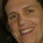

Detection 1: Left: 170 Top: 251 Right: 222 Bottom: 303


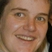

Detection 2: Left: 434 Top: 257 Right: 477 Bottom: 300


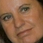

Detection 3: Left: 160 Top: 127 Right: 204 Bottom: 170


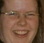

Detection 4: Left: 63 Top: 271 Right: 137 Bottom: 345


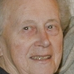

Detection 5: Left: 516 Top: 146 Right: 559 Bottom: 190


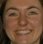

Detection 6: Left: 88 Top: 122 Right: 132 Bottom: 166


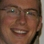

Detection 7: Left: 482 Top: 89 Right: 525 Bottom: 132


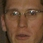

Detection 8: Left: 481 Top: 246 Right: 543 Bottom: 308


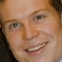

Detection 9: Left: 241 Top: 166 Right: 277 Bottom: 202


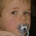

Detection 10: Left: 635 Top: 229 Right: 710 Bottom: 304


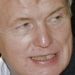

Detection [(280, 132) (323, 175)], score: 2.4185800706215326, face_type:1


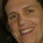

Detection [(170, 251) (222, 303)], score: 2.309009412398043, face_type:2


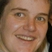

Detection [(434, 257) (477, 300)], score: 2.2943212380252325, face_type:3


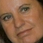

Detection [(160, 127) (204, 170)], score: 1.991864064802828, face_type:2


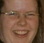

Detection [(63, 271) (137, 345)], score: 1.9724815879961874, face_type:2


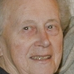

Detection [(516, 146) (559, 190)], score: 1.947145763827693, face_type:0


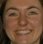

Detection [(88, 122) (132, 166)], score: 1.6645677723420973, face_type:0


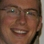

Detection [(482, 89) (525, 132)], score: 1.6224918519325677, face_type:1


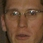

Detection [(481, 246) (543, 308)], score: 1.6041995873294317, face_type:3


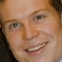

Detection [(241, 166) (277, 202)], score: 1.0548327957293417, face_type:2


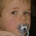

Detection [(635, 229) (710, 304)], score: 1.0013927017352011, face_type:2


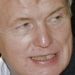

Detection [(631, 146) (674, 190)], score: -0.14415067057477282, face_type:0


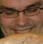

Detection [(577, 86) (613, 122)], score: -0.3624711642422236, face_type:3


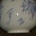

Detection [(331, 285) (383, 337)], score: -0.367293580882984, face_type:1


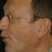

Detection [(581, 182) (617, 218)], score: -0.6923155150877123, face_type:0


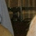

Detection [(38, 38) (113, 113)], score: -0.7441930137144213, face_type:0


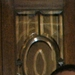

Detection [(269, 234) (305, 270)], score: -0.8823861921958502, face_type:1


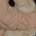

Detection [(664, 46) (708, 89)], score: -0.9236115775571947, face_type:0


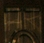

Detection [(223, 209) (266, 252)], score: -0.9733761251345681, face_type:4


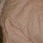

In [0]:
#!/usr/bin/python
# The contents of this file are in the public domain. See LICENSE_FOR_EXAMPLE_PROGRAMS.txt
# SOURCE: http://dlib.net/face_detector.py.html
#
#   This example program shows how to find frontal human faces in an image.  In
#   particular, it shows how you can take a list of images from the command
#   line and display each on the screen with red boxes overlaid on each human
#   face.
#
#   This face detector is made using the now classic Histogram of Oriented
#   Gradients (HOG) feature combined with a linear classifier, an image
#   pyramid, and sliding window detection scheme.  This type of object detector
#   is fairly general and capable of detecting many types of semi-rigid objects
#   in addition to human faces.  Therefore, if you are interested in making
#   your own object detectors then read the train_object_detector.py example
#   program.  
#
# COMPILING/INSTALLING THE DLIB PYTHON INTERFACE
#   You can install dlib using the command:
#       pip install dlib
#
#   Alternatively, if you want to compile dlib yourself then go into the dlib
#   root folder and run:
#       python setup.py install
#
#   Compiling dlib should work on any operating system so long as you have
#   CMake installed.  On Ubuntu, this can be done easily by running the
#   command:
#       sudo apt-get install cmake
#
#   Also note that this example requires Numpy which can be installed
#   via the command:
#       pip install numpy

import dlib
import io

# SOURCE: https://gist.github.com/kylemcdonald/2f1b9a255993bf9b2629
import PIL
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

def renderFace(img, d):
    showarray(img[d.top():d.bottom(), d.left():d.right()])

detector = dlib.get_frontal_face_detector()
f = "image10.jpeg"
print("Processing file: {}".format(f))
img = dlib.load_rgb_image(f)

# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, d.left(), d.top(), d.right(), d.bottom()))
    renderFace(img, d)

# Finally, if you really want to you can ask the detector to tell you the score
# for each detection.  The score is bigger for more confident detections.
# The third argument to run is an optional adjustment to the detection threshold,
# where a negative value will return more detections and a positive value fewer.
# Also, the idx tells you which of the face sub-detectors matched.  This can be
# used to broadly identify faces in different orientations.
img = dlib.load_rgb_image(f)
dets, scores, idx = detector.run(img, 1, -1)
for i, d in enumerate(dets):
    print("Detection {}, score: {}, face_type:{}".format(
        d, scores[i], idx[i]))
    renderFace(img, d)

Number of faces detected: 11


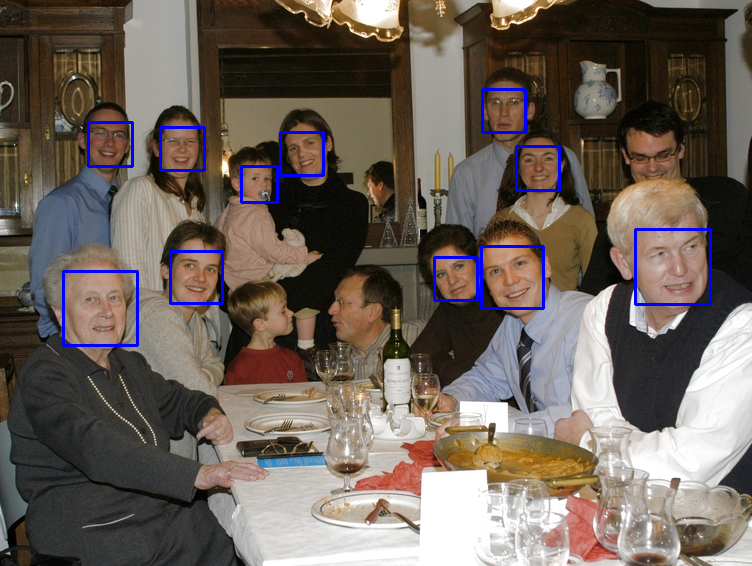

In [0]:
import sys

import dlib
import cv2
from google.colab.patches import cv2_imshow

detector = dlib.get_frontal_face_detector()

imgCV = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/image10.jpeg')
img = dlib.load_rgb_image('/content/gdrive/My Drive/Colab Notebooks/image10.jpeg')
# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
dets = detector(img, 1)
  
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    cv2.rectangle(imgCV,(d.left(),d.top()),(d.right(),d.bottom()),(255,0,0),2)
    #cv2.circle(imgCV,d.left(),2,(255,0,0))
cv2_imshow(imgCV)
    


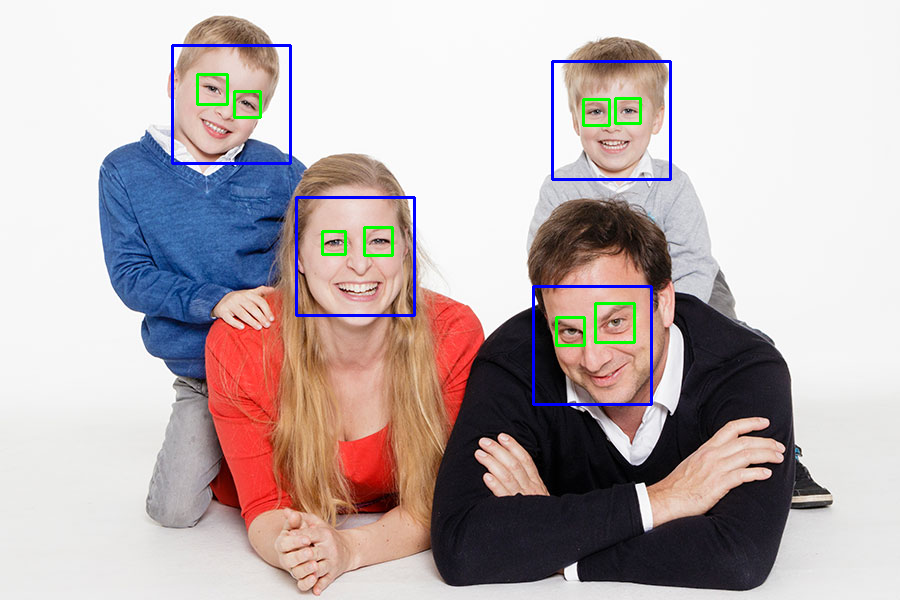

-1

In [0]:
import cv2
from google.colab.patches import cv2_imshow

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Colab Notebooks/haarcascade_eye.xml')
# Read the input image
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/123.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray,1.7,3)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
# Display the output
cv2_imshow(img)
cv2.waitKey()